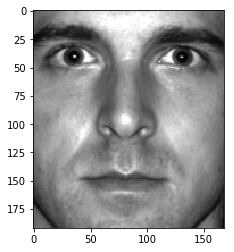

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import os

def plot_image(filename):
    content_array = get_array(filename)
    plt.imshow(content_array/255, cmap='gray')
    plt.show()

filename = 'CroppedYale/CroppedYale/yaleB10/yaleB10_P00A+000E+00.pgm'
plot_image(filename)

In [2]:
def read_pgm_list(pgmf):
    """Return a raster of integers from a PGM as a list"""
    pgmf.readline()
    (width, height) = [int(i) for i in pgmf.readline().split()]
    depth = int(pgmf.readline())
    assert depth <= 255

    row = []
    for y in range(height):
        for y in range(width):
            row.append(ord(pgmf.read(1)))
    return row

def get_list(filename):
    infile = open(filename,'rb')
    content_list = read_pgm_list(infile)
    return np.array(content_list)

In [4]:
subjects = list(range(10))
def get_data(subjects):
    root_dir = os.getcwd() + '\CroppedYale\CroppedYale\yaleB2'

    images = None
    labels = []
    for i in subjects:
        subject_dir = root_dir + str(subjects[i])
        filenames = [f for f in os.listdir(subject_dir) if os.path.isfile(os.path.join(subject_dir, f)) 
                     and f.endswith('.pgm') and not f.endswith('Ambient.pgm')]
        for filename in filenames:
            filepath = "{0}\{1}".format(subject_dir, filename)
            labels.append(i)
            img_arr = get_list(filepath)
            if images is None:
                images = img_arr
            else:
                images = np.vstack((images, img_arr))
    num_examples = len(labels)
    labels_array = np.zeros((num_examples, len(subjects)))
    for i, label in enumerate(labels):
        labels_array[i, label] += 1
    return (images, labels_array)   

In [5]:
images, labels = get_data(subjects)

In [6]:
images.shape

(640, 32256)

In [7]:
labels.shape

(640, 10)

In [8]:
labels

array([[ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.]])

In [9]:
num_examples = len(labels)  # 640

In [10]:
import random
shuffled_list = list(range(num_examples))
random.shuffle(shuffled_list) 

In [12]:
train_indices = shuffled_list[:480]
validation_indices = shuffled_list[480:(480+64)]
test_indices = shuffled_list[(480+64):]

In [13]:
train_images = images[train_indices]
train_labels = labels[train_indices]

validation_images = images[validation_indices]
validation_labels = labels[validation_indices]

test_images = images[test_indices]
test_labels = labels[test_indices]

In [14]:
test_labels.shape

(96, 10)

## Deep neural network

In [18]:
neuron_1 = 1000
neuron_2 = 3000
neuron_3 = 2000
#neuron_4 = 800
learning_rate = 1e-4
num_train_examples = train_images.shape[0]
iters = 3*num_train_examples
batch_size = 100
num_subjects = len(subjects)
keep_prob = tf.placeholder(tf.float32)

In [19]:
x = tf.placeholder(shape=[None, 32256], dtype=tf.float32)
y_correct = tf.placeholder(shape=[None, num_subjects], dtype=tf.float32)

W_1 = tf.Variable(tf.truncated_normal(shape=[32256, neuron_1], stddev=0.1))
b_1 = tf.Variable(tf.truncated_normal(shape=[neuron_1], stddev=0.1))

z_1 = tf.add(tf.matmul(x, W_1), b_1)
#a_1 = tf.nn.relu(z_1)
a_1 = tf.nn.dropout(tf.nn.relu(z_1), keep_prob=keep_prob)

W_2 = tf.Variable(tf.truncated_normal(shape=[neuron_1, neuron_2], stddev=0.1))
b_2 = tf.Variable(tf.truncated_normal(shape=[neuron_2], stddev=0.1))

z_2 = tf.add(tf.matmul(a_1, W_2), b_2)
#a_2 = tf.nn.relu(z_2)
a_2 = tf.nn.dropout(tf.nn.relu(z_2), keep_prob=keep_prob)

##### 4 layers
#W_3 = tf.Variable(tf.truncated_normal(shape=[neuron_2, neuron_3], stddev=0.1))
#b_3 = tf.Variable(tf.truncated_normal(shape=[neuron_3], stddev=0.1))
#z_3 = tf.add(tf.matmul(a_2, W_3), b_3)
#a_3 = tf.nn.relu(z_3)
#W_4 = tf.Variable(tf.truncated_normal(shape=[neuron_3, neuron_4], stddev=0.1))
#b_4 = tf.Variable(tf.truncated_normal(shape=[neuron_4], stddev=0.1))
#z_4 = tf.add(tf.matmul(a_3, W_4), b_4)
#a_4 = tf.nn.relu(z_4)
#W_5 = tf.Variable(tf.truncated_normal(shape=[neuron_4, num_subjects], stddev=0.1))
#b_5 = tf.Variable(tf.truncated_normal(shape=[num_subjects], stddev=0.1))
#y = tf.add(tf.matmul(a_4, W_5), b_5)
##### End of 4 layers

##### 3 layers
W_3 = tf.Variable(tf.truncated_normal(shape=[neuron_2, neuron_3], stddev=0.1))
b_3 = tf.Variable(tf.truncated_normal(shape=[neuron_3], stddev=0.1))
z_3 = tf.add(tf.matmul(a_2, W_3), b_3)
a_3 = tf.nn.dropout(tf.nn.relu(z_3), keep_prob=keep_prob)
W_4 = tf.Variable(tf.truncated_normal(shape=[neuron_3, num_subjects], stddev=0.1))
b_4 = tf.Variable(tf.truncated_normal(shape=[num_subjects], stddev=0.1))
y = tf.add(tf.matmul(a_3, W_4), b_4)
##### End of 3 layers

##### 2 layers
#W_3 = tf.Variable(tf.truncated_normal(shape=[neuron_2, num_subjects], stddev=0.1))
#b_3 = tf.Variable(tf.truncated_normal(shape=[num_subjects], stddev=0.1))
#y = tf.add(tf.matmul(a_2, W_3), b_3)
##### End of 2 layers

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y, labels = y_correct))

train_step = tf.train.AdamOptimizer(learning_rate).minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_correct,1), name = "correct_prediction")
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

sess = tf.Session()
sess.run(tf.global_variables_initializer())

#feed_dict = {x: train_images, y_correct: train_labels }
#sess.run(train_step, feed_dict = feed_dict)
#sess.run(accuracy, feed_dict=feed_dict)

#train_feed_dict = {x: train_images, y_correct: train_labels }
validation_feed_dict = {x: validation_images, y_correct: validation_labels, keep_prob:1.0 }
test_feed_dict = {x: test_images, y_correct: test_labels, keep_prob:1.0 }

for i in range(iters):
    train_indices = random.sample(range(num_train_examples), batch_size)
    train_feed_dict = {x: train_images[train_indices], y_correct: train_labels[train_indices], keep_prob:0.7 }
    if i%250 == 0:
        # print accuracy
        train_acc = sess.run(accuracy, feed_dict=train_feed_dict)
        validation_acc = sess.run(accuracy, feed_dict=validation_feed_dict)
        print("STEP {}".format(i))
        print("Train accuracy: {}".format(train_acc))
        print("Validation accuracy: {}".format(validation_acc))

    _ = sess.run(train_step, feed_dict = train_feed_dict)

test_acc = sess.run(accuracy, feed_dict=test_feed_dict)
print("DONE. Test accuracy: {}".format(test_acc))

STEP 0
Train accuracy: 0.09999999403953552
Validation accuracy: 0.09375
STEP 250
Train accuracy: 0.9599999189376831
Validation accuracy: 0.921875
STEP 500
Train accuracy: 0.9599999785423279
Validation accuracy: 0.96875
STEP 750
Train accuracy: 0.9800000190734863
Validation accuracy: 0.9375
STEP 1000
Train accuracy: 0.9999999403953552
Validation accuracy: 0.96875
STEP 1250
Train accuracy: 1.0
Validation accuracy: 0.96875
DONE. Test accuracy: 0.9895833730697632


## DNN results
| Number of layers | neurons per layer | learning rate | batch_size | iters | keep_prob | test accuracy |
|:-----------------|:------------------|:--------------|------------|:------|:----------|:--------------|
| 2| 2000, 2000 | 1e-4| 200 | 5m| 1 | 92 |
| 2| 2000, 2000 | 1e-4| 100 | 5m | 1 | 86 |
| 3| 5000, 2000, 1000 | 1e-4 | 100 | 5m | 1 | 93 |
| 3| 1000, 2000, 3000 | 1e-4 | 100 | 3m | 1 | 92 |
| 3| 1000, 2000, 3000 | 1e-4 | 100 | 3m | 0.7 | 98.95833730697632 |
| 4| 1500, 1500, 1000, 500 | 1e-4 | 100 | 1 | 5m | 85 |
| 4| 400, 400, 400, 400 | 1e-4 | 100 | 5m | 1 | 89 |
| 4| 200, 200, 200, 200 | 1e-4 | 100 | 3m | 1 | 80 |
| 4| 800, 800, 800, 800 | 1e-4 | 100 | 3m | 1 | 89 |

In [22]:
(100 - 98.95833730697632) * 96 / 100 # images misclassified

0.9999961853027344